<a href="https://colab.research.google.com/github/haryowiradito/Proyek-Analisis-Data-Bike-Sharing-Dataset/blob/main/Proyek_Analisis_Data_Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Haryo Wiradito
- **Email:** M010D4KY1903@bangkit.academy
- **ID Dicoding:** M010D4KY1903

## Menentukan Pertanyaan Bisnis

- How is the sales perform in different seasons?
- When is the average highest time traffic of the day?

## Import Semua Packages/Library yang Digunakan

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

load data dataset day.csv

In [267]:
day_df = pd.read_csv("/content/Bike Sharing Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


load data dataset hour.csv

In [268]:
hour_df = pd.read_csv("/content/Bike Sharing Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

assess data day_df

In [269]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [270]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [271]:
print("jumlah duplikat: ", day_df.duplicated().sum())

jumlah duplikat:  0


assess data hour_df

In [272]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [273]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [274]:
print("jumlah duplikat: ", hour_df.duplicated().sum())

jumlah duplikat:  0


### Cleaning Data

cleaning data day_df

- mengubah type data dr int ke datetime


In [275]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [276]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

cleaning data hour_df

- mengubah type data dr int ke datetime

In [277]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [278]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [279]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mencari data jumlah rental yang terjadi di musim yang berbeda

In [280]:
day_df.groupby(by='season')['cnt'].sum().reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


explore hour_df

hour_df

In [281]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


mencari rata rata jumlah rental yang terjadi per jam

In [282]:
hour_df.groupby(by=["hr"])['cnt'].mean().reset_index()

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


all_df (gabung day and hour)

In [283]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
)

all_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


mengubah nama untuk memudahkan dalam pembacaan data

In [284]:
season_name = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
all_df['season'] = all_df['season'].replace(season_name)

In [285]:
all_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3786,3787,2011-06-11,summer,0,6,16,0,6,0,2,0.80,0.7273,0.46,0.1940,169,225,394
16173,16174,2012-11-11,winter,1,11,15,0,0,0,1,0.56,0.5303,0.37,0.2239,304,420,724
2267,2268,2011-04-09,summer,0,4,8,0,6,0,2,0.32,0.3030,0.93,0.1642,7,47,54
12947,12948,2012-06-28,fall,1,6,16,0,4,1,1,0.88,0.7424,0.23,0.1940,56,331,387
14037,14038,2012-08-13,fall,1,8,2,0,1,1,1,0.64,0.6061,0.69,0.1045,1,8,9
4657,4658,2011-07-17,fall,0,7,23,0,0,0,1,0.70,0.6667,0.74,0.1343,39,54,93
862,863,2011-02-08,spring,0,2,9,0,2,1,1,0.24,0.1970,0.52,0.4925,7,128,135
2442,2443,2011-04-16,summer,0,4,16,0,6,0,3,0.50,0.4848,0.88,0.4627,6,27,33
15012,15013,2012-09-22,fall,1,9,17,0,6,0,1,0.74,0.6667,0.51,0.3284,195,451,646
13068,13069,2012-07-03,fall,1,7,17,0,2,1,2,0.86,0.7424,0.30,0.1642,102,620,722


## Visualization & Explanatory Analysis

### Pertanyaan 1: How is the sales perform in different seasons?

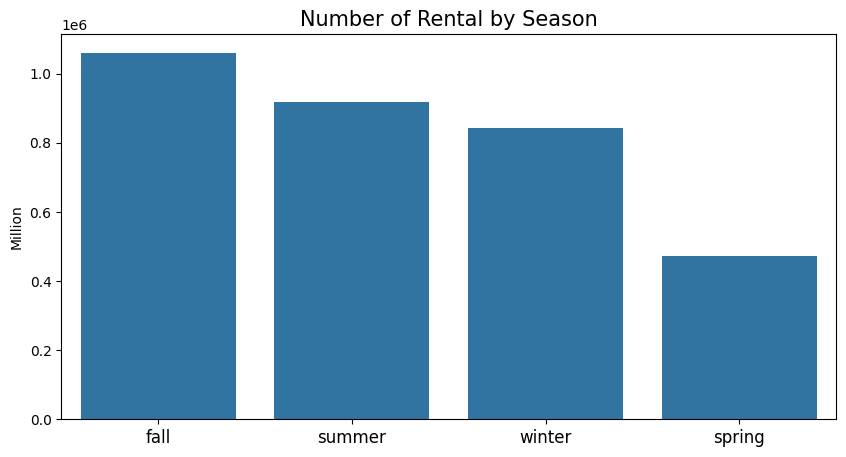

In [286]:
byseason_df = all_df.groupby(by="season")["cnt"].sum().reset_index()
byseason_df.rename(columns={
    "cnt": "rental_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="rental_count",
    x="season",
    data=byseason_df.sort_values(by="rental_count", ascending=False)
)
plt.title("Number of Rental by Season", loc="center", fontsize=15)
plt.ylabel("Million")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: When is the average highest time traffic of the day?

In [287]:
all_df.groupby(by=["hr"])['cnt'].mean().sort_values(ascending=False).head(5).reset_index()

,hr,cnt
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352


<function matplotlib.pyplot.show(close=None, block=None)>

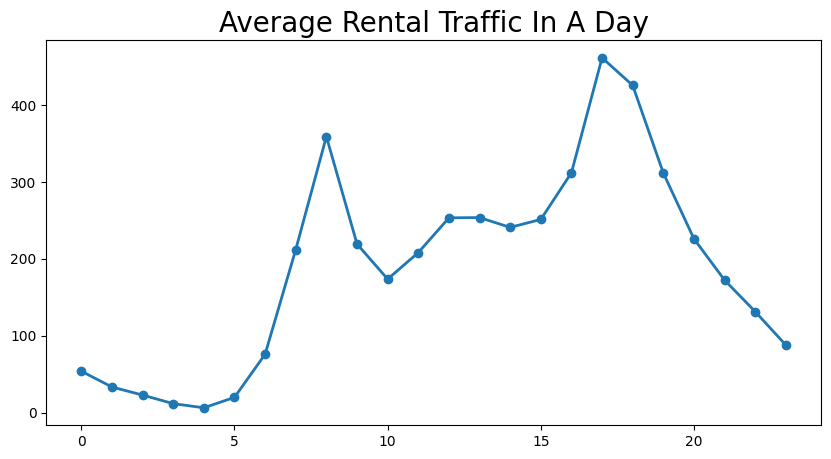

In [288]:
plt.figure(figsize=(10,5))
byhour_df = all_df.groupby('hr')['cnt'].mean()

plt.plot(
    byhour_df.index,
    byhour_df,
    marker='o',
    linewidth=2,
)

plt.title("Average Rental Traffic In A Day", loc = "center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

## Conclusion

- In Two years of operating, The highest number of rental has been done in Fall Season with over 1 million, whilst the lowest is in Spring Season with approximately 500 thousands
- Turning on, the average number of rental based on hour during a day indicate a fluctuative trend, it show that the highest traffic is at around 17.00 and 18.00, on the other hand, the lowest is at 04.00 or after midnight